In [2]:
import json
import ImageSegmentation as ImageSegmentation
import os
import utils.utils_common as utils_common
from segment_anything import sam_model_registry, SamPredictor
import cv2
import matplotlib.pyplot as plt
import time

In [18]:

config = {
    "checkpoint_path": "../../sam_vit_h_4b8939.pth",
    "parent_dir": "../../data/scan_3",
    "img_name": "0027.png",
    "instance_json": "../../data/scan_3/instance_segmentation.json",
    "anchor_seeds": {
        "0027.png": {
             # NOTE: Anchor seeds are specified in (x, y) coordinate format.
            "Appa": [
                [450, 534],
                [373, 600],
                [394, 541]
            ],
            "Milk": [
                [540, 483],
                [539, 307],
                [490, 616]
            ],
            "PurpleDude": [
                [548, 634],
                [521, 562],
                [554, 681]
            ]
        }
}
}

def main(config, device="cpu"):
    # Load SAM model
    sam = sam_model_registry["vit_h"](checkpoint=config["checkpoint_path"])
    sam.to(device)
    predictor = SamPredictor(sam)

    # Paths
    parent_dir = config["parent_dir"]
    img_name = config["img_name"]
    img_path = os.path.join(parent_dir, "images", img_name)
    out_dir = os.path.join(parent_dir, "anchor")
    os.makedirs(out_dir, exist_ok=True)

    # Load instance category and anchors
    instance_category = json.load(open(config["instance_json"]))
    anchor_seed = config["anchor_seeds"][img_name]
    
    # Load image
    image = cv2.imread(img_path)
    H, W = image.shape[:2]

    # Segment
    imgSeg = ImageSegmentation.ImageSegmentation(predictor, instance_category, anchor_seed, H, W)
    colored_mask = imgSeg.segment_image(img_path, anchor_seed)

    # Save result
    outpath = os.path.join(out_dir, img_name)
    plt.imsave(outpath, colored_mask)
    
    return colored_mask

    
colored_mask = main(config)

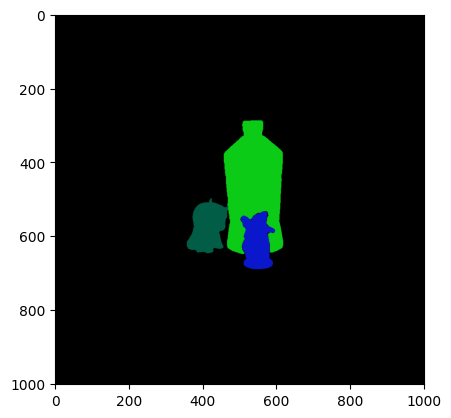

In [19]:
plt.imshow(colored_mask)